In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, recall_score,accuracy_score
import pickle

In [2]:
pd.set_option('display.max_columns', None)

Dataset was obtained from kaggle here: https://www.kaggle.com/datasets/girishvutukuri/predict-if-the-merchant-is-fraudster <br>
Unfortunately, for unknown reasons, the dataset has been taken down from kaggle. <br>
This is a large dataset with separate test and train datasets, and is highly imbalanced. <br>
There are almost 1.3 million instances in the train set, and a little more than half million instances in the test set.

In [98]:
df = pd.read_csv("fraudTrain.csv")
df_test = pd.read_csv("fraudTest.csv")

In [5]:
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [6]:
df_test

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,63453,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [7]:
df['cc_num'].nunique()

983

This dataset has data from 983 credit card users.

In [99]:
df['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [100]:
df_test['is_fraud'].value_counts()

0    553574
1      2145
Name: is_fraud, dtype: int64

This is a highly imbalanced dataset.

In [74]:
todrop = ['cc_num','merchant','first','last','street','city','zip','job','dob','trans_num']

In [75]:
df.drop(todrop,axis=1,inplace=True)
df_test.drop(todrop,axis=1,inplace=True)

In [14]:
df

,trans_date_trans_time,category,amt,gender,state,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,misc_net,4.97,F,NC,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,grocery_pos,107.23,F,WA,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,entertainment,220.11,M,ID,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,gas_transport,45.00,M,MT,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,misc_pos,41.96,M,VA,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,entertainment,15.56,M,UT,37.7175,-112.4777,258,1371816728,36.841266,-111.690765,0
1296671,2020-06-21 12:12:19,food_dining,51.70,M,MD,39.2667,-77.5101,100,1371816739,38.906881,-78.246528,0
1296672,2020-06-21 12:12:32,food_dining,105.93,M,NM,32.9396,-105.8189,899,1371816752,33.619513,-105.130529,0
1296673,2020-06-21 12:13:36,food_dining,74.90,M,SD,43.3526,-102.5411,1126,1371816816,42.788940,-103.241160,0


In [15]:
df_test

,trans_date_trans_time,category,amt,gender,state,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,personal_care,2.86,M,SC,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,personal_care,29.84,F,UT,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,health_fitness,41.28,F,NY,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,misc_pos,60.05,M,FL,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,travel,3.19,M,MI,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,health_fitness,43.77,M,MO,40.4931,-91.8912,519,1388534347,39.946837,-91.333331,0
555715,2020-12-31 23:59:09,kids_pets,111.84,M,TX,29.0393,-95.4401,28739,1388534349,29.661049,-96.186633,0
555716,2020-12-31 23:59:15,kids_pets,86.88,F,WA,46.1966,-118.9017,3684,1388534355,46.658340,-119.715054,0
555717,2020-12-31 23:59:24,travel,7.99,M,ID,44.6255,-116.4493,129,1388534364,44.470525,-117.080888,0


### Exploratory Data Analysis

#### State

Group by state and then value count on is_fraud shows that DE has only 9 total entries and all are fraud. That can be attributed to limited data. Some of the states have much lesser number of samples. Hence, I don't think this can be used as a reliable feature.

In [17]:
df['state'].value_counts()

TX    94876
NY    83501
PA    79847
CA    56360
OH    46480
MI    46154
IL    43252
FL    42671
AL    40989
MO    38403
MN    31714
AR    31127
NC    30266
WI    29368
VA    29250
SC    29190
KY    28475
IN    27580
IA    26985
OK    26671
MD    26193
GA    26063
WV    25691
NJ    24603
NE    24168
KS    22996
MS    21188
LA    20965
WY    19322
WA    18924
OR    18597
TN    17554
ME    16505
NM    16407
ND    14786
CO    13880
MA    12376
SD    12324
VT    11768
MT    11754
AZ    10770
UT    10699
NH     8278
CT     7702
NV     5607
ID     5545
DC     3613
HI     2559
AK     2120
RI      550
DE        9
Name: state, dtype: int64

In [18]:
group_state = df.groupby('state')

fraud_occurence_frac = dict()
fraud_occurence = dict()

high_frac = list()
high_abs = list()

for name,group in group_state:
    f = group['is_fraud'].value_counts()
    if f.shape[0] > 1:
        fraud_occurence['{}'.format(name)] = f[1]
        fraud_occurence_frac['{}'.format(name)] = f[1]/group.shape[0]*100
        
        if f[1] > 300:
            high_abs.append(name)
        if f[1]/group.shape[0] > 0.01:
            high_frac.append(name)

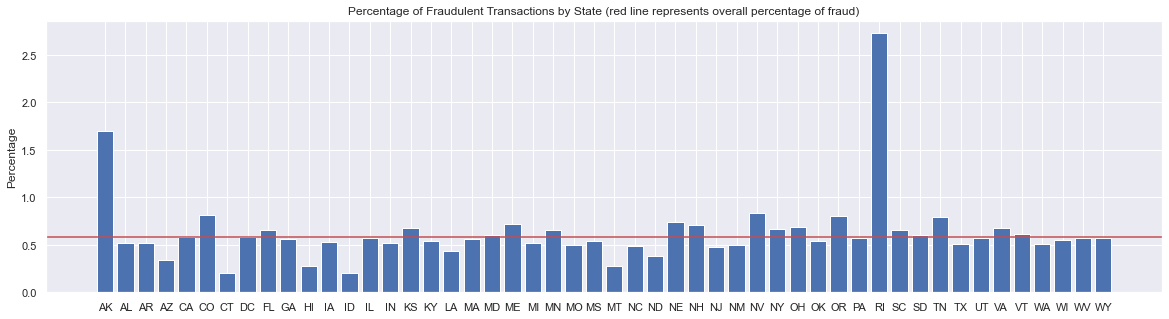

In [19]:
fig,ax = plt.subplots(figsize=(20,5))
ax.bar(range(len(fraud_occurence_frac)),list(fraud_occurence_frac.values()),
        tick_label = list(fraud_occurence_frac.keys()))
ax.set_title("Percentage of Fraudulent Transactions by State (red line represents overall percentage of fraud)")
plt.axhline(y = df['is_fraud'].value_counts()[1]/df.shape[0]*100, color = 'r', linestyle = '-')
ax.set_ylabel("Percentage")
plt.show()

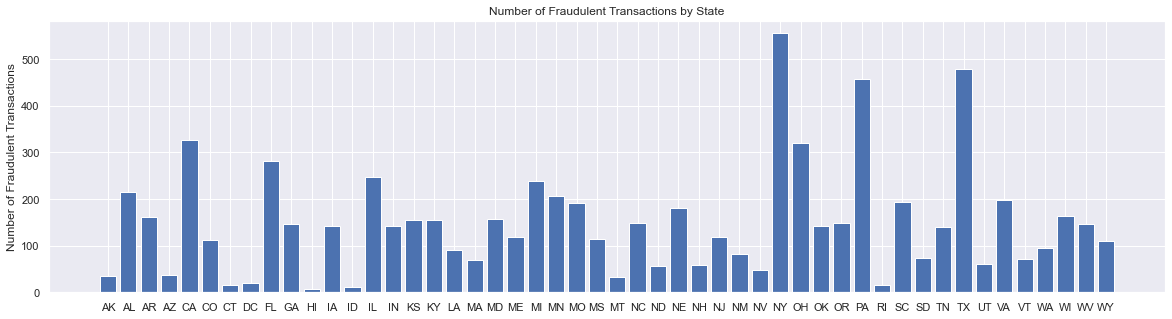

In [20]:
fig,ax = plt.subplots(figsize=(20,5))
ax.bar(range(len(fraud_occurence)),list(fraud_occurence.values()),
        tick_label = list(fraud_occurence.keys()))
ax.set_title("Number of Fraudulent Transactions by State")
ax.set_ylabel("Number of Fraudulent Transactions")
plt.show()

In [21]:
high_frac, high_abs 

(['AK', 'RI'], ['CA', 'NY', 'OH', 'PA', 'TX'])

AK and RI have highest percentage of fraud occurence, while CA, NY, OH, PA and TX have highest number of fraud occurence - this is not surprising because they are large states with large populations, hence more transactions, and hence more fraud. But if you look at the percentage of occurence, they are hugging the national percentage.

#### Time

I will convert the date-time to date-time format and extract month of year and hour of day, to make new features.

In [76]:
df['trans_datetime'] = pd.to_datetime(df['trans_date_trans_time'])

In [23]:
max(df['trans_datetime']), min(df['trans_datetime'])

(Timestamp('2020-06-21 12:13:37'), Timestamp('2019-01-01 00:00:18'))

In [77]:
df['trans_month'] = df['trans_datetime'].apply(lambda x:x.date().month)
df['trans_hour'] = df['trans_datetime'].apply(lambda x:x.time().hour)

##### Percentage of fraudulent transactions by month

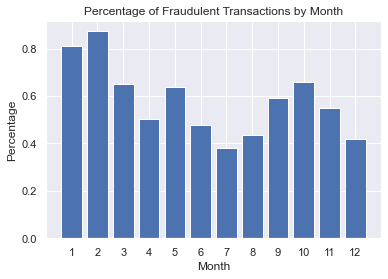

In [25]:
group_month = df.groupby('trans_month')

monthwise_fraud_frac = dict()
for month,group in group_month:
    f = group['is_fraud'].value_counts()[1]/group.shape[0]*100
    monthwise_fraud_frac['{}'.format(month)]=f

plt.bar(range(len(monthwise_fraud_frac)),list(monthwise_fraud_frac.values()),
        tick_label = list(monthwise_fraud_frac.keys()))
plt.title("Percentage of Fraudulent Transactions by Month")
plt.xlabel("Month")
plt.ylabel("Percentage")
plt.show()

##### Percentage of fraudulent transactions by hour of day

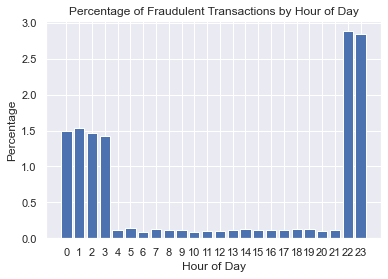

In [26]:
group_hour = df.groupby('trans_hour')

hourwise_fraud_frac = dict()
for hour,group in group_hour:
    f = group['is_fraud'].value_counts()[1]/group.shape[0]*100
    hourwise_fraud_frac['{}'.format(hour)]=f

plt.bar(range(len(hourwise_fraud_frac)),list(hourwise_fraud_frac.values()),
        tick_label = list(hourwise_fraud_frac.keys()))
plt.title("Percentage of Fraudulent Transactions by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Percentage")
plt.show()

There seems to be a pattern in percentage of fraudulent transactions by month.<br> 
But there is no ignoring that the wee hours of the night are the hours where fraudulent activities spike. This is an important feature.

#### Location
##### Consumer Location

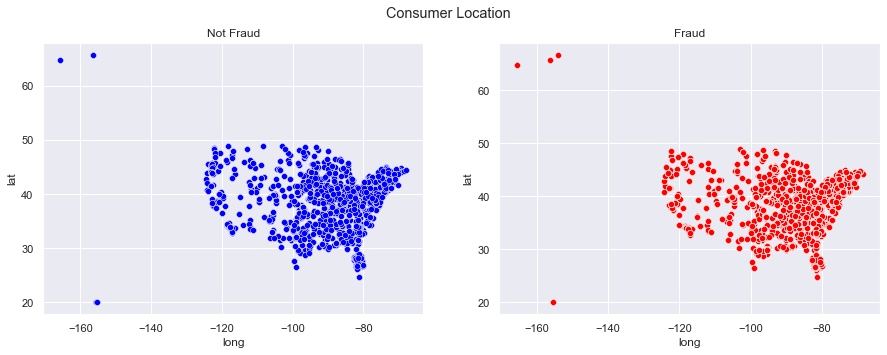

In [20]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
plt.suptitle("Consumer Location")
sns.scatterplot(data=df.loc[df['is_fraud']==0],x='long',y='lat',color='blue',ax=ax[0])
ax[0].set_title("Not Fraud")
sns.scatterplot(data=df.loc[df['is_fraud']==1],x='long',y='lat',color='red',ax=ax[1])
ax[1].set_title("Fraud")
plt.show()

##### Merchant Location

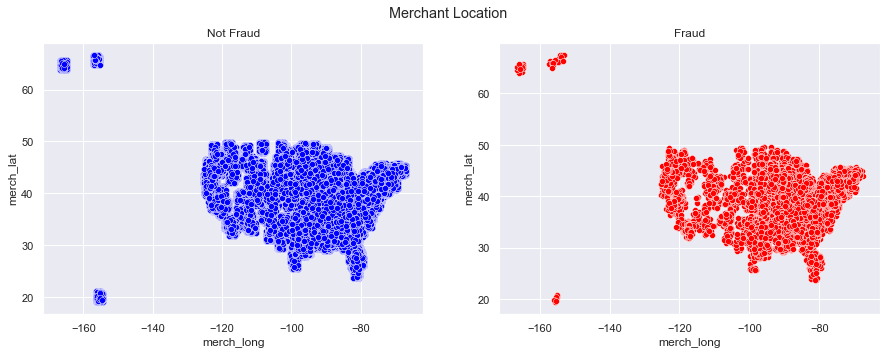

In [21]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
plt.suptitle("Merchant Location")
sns.scatterplot(data=df.loc[df['is_fraud']==0],x='merch_long',y='merch_lat',color='blue',ax=ax[0])
ax[0].set_title("Not Fraud")
sns.scatterplot(data=df.loc[df['is_fraud']==1],x='merch_long',y='merch_lat',color='red',ax=ax[1])
ax[1].set_title("Fraud")
plt.show()

Basically, fraud is happening everywhere - both on the consumer side and merchant side. Not important features. I might even discard them.

#### Transaction Amount

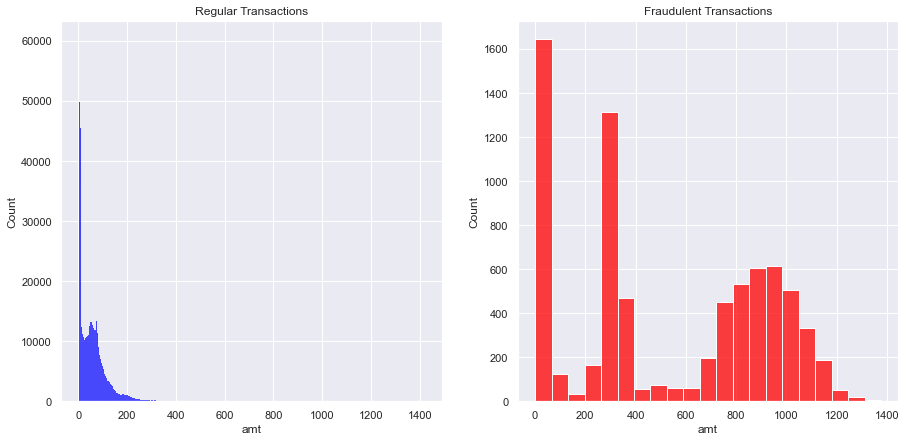

In [22]:
fig,ax = plt.subplots(1,2,figsize=(15,7))
sns.histplot(df['amt'].loc[(df['is_fraud']==0)&(df['amt']<1420)],color='blue',ax=ax[0])
ax[0].set_title("Regular Transactions")
sns.histplot(df['amt'].loc[df['is_fraud']==1],color='red',ax=ax[1])
ax[1].set_title("Fraudulent Transactions")
plt.show()

The regular transactions have a very long tail. I capped the plot where the fraudulent transactions naturally die off earlier (around $1400). It seems that fraudulent transactions do not have a long tail (too high of a transaction would raise flags). Also, the distribution of the transactions is different. This should be an important feature.

#### Gender

In [23]:
group_gender = df.groupby('gender')

print("Overall percentage of fraudulent transactions is {:.3}%".format(df['is_fraud'].value_counts()[1]/df.shape[0]*100))
print("\nPercentage of fraudulent transactions by gender")
for gender,group in group_gender:
    print(gender+" {:.3}%".format(group['is_fraud'].value_counts()[1]/group.shape[0]*100))

Overall percentage of fraudulent transactions is 0.579%

Percentage of fraudulent transactions by gender
F 0.526%
M 0.643%


There is a slightly higher occurence of fraud in males. <br>

#### Transaction Category

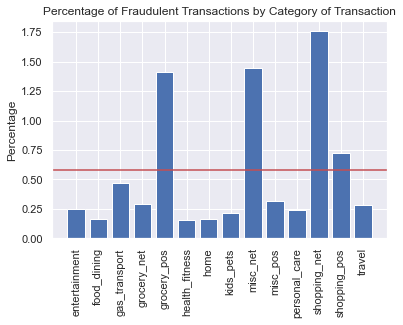

In [24]:
group_cat = df.groupby('category')

cat_frac = dict()
for name,group in group_cat:
    cat_frac['{}'.format(name)] = group['is_fraud'].value_counts()[1]/group.shape[0]*100

plt.bar(range(len(cat_frac)),list(cat_frac.values()),
        tick_label = list(cat_frac.keys()))
plt.title("Percentage of Fraudulent Transactions by Category of Transaction")
plt.xticks(rotation=90)
plt.ylabel("Percentage")
plt.axhline(y = df['is_fraud'].value_counts()[1]/df.shape[0]*100, color = 'r', linestyle = '-')
plt.show()

Grocery_pos, Misc_net, Shopping_net and shopping_pos are the transaction types where most fraud is happening. I will make this a binary feature where its 1 if it equals any of the above 4, and 0 otherwise.

#### City Population

This is a feature with very long tails. To be able to see the actual distribution for both fraudulent and non-fraudulent cases, I section it up into 3: <br> 
- population below 100k 
- population between 100k and 1M
- population above 1M.

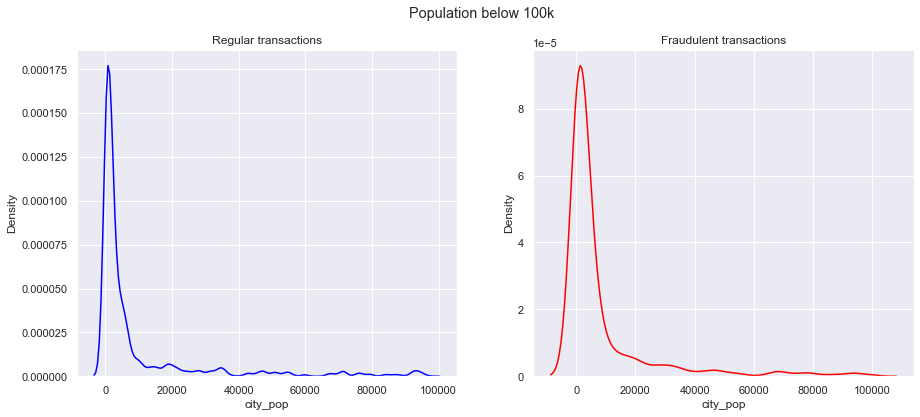

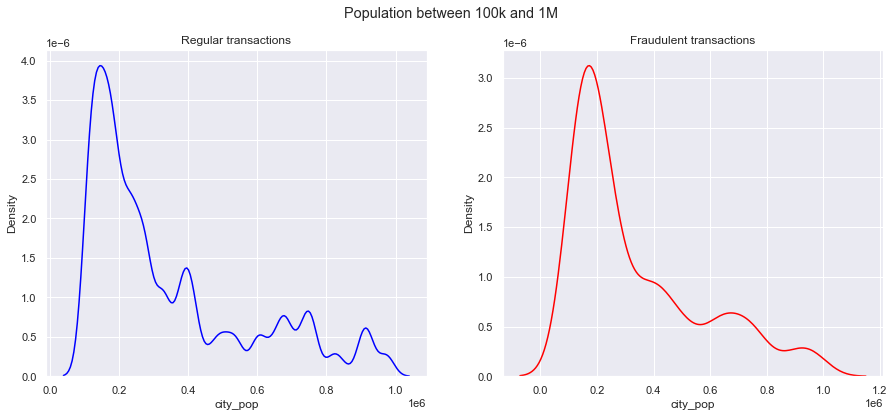

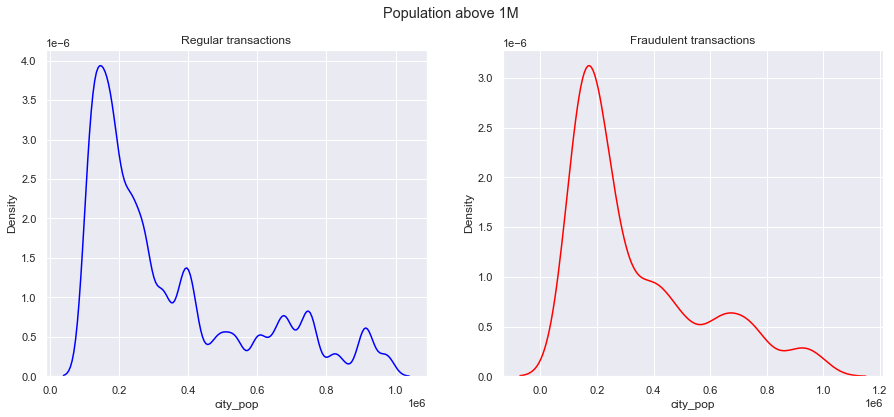

In [25]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
plt.suptitle("Population below 100k")
sns.kdeplot(data=df.loc[(df['is_fraud']==0)&(df['city_pop']<1e5)],x='city_pop',color='blue',ax=ax[0])
ax[0].set_title("Regular transactions")
sns.kdeplot(data=df.loc[(df['is_fraud']==1)&(df['city_pop']<1e5)],x='city_pop',color='red',ax=ax[1])
ax[1].set_title("Fraudulent transactions")
plt.show()

fig,ax = plt.subplots(1,2,figsize=(15,6))
plt.suptitle("Population between 100k and 1M")
sns.kdeplot(data=df.loc[(df['is_fraud']==0)&(df['city_pop']>1e5)&(df['city_pop']<1e6)],x='city_pop',color='blue',ax=ax[0])
ax[0].set_title("Regular transactions")
sns.kdeplot(data=df.loc[(df['is_fraud']==1)&(df['city_pop']>1e5)&(df['city_pop']<1e6)],x='city_pop',color='red',ax=ax[1])
ax[1].set_title("Fraudulent transactions")
plt.show()

fig,ax = plt.subplots(1,2,figsize=(15,6))
plt.suptitle("Population above 1M")
sns.kdeplot(data=df.loc[(df['is_fraud']==0)&(df['city_pop']>1e5)&(df['city_pop']<1e6)],x='city_pop',color='blue',ax=ax[0])
ax[0].set_title("Regular transactions")
sns.kdeplot(data=df.loc[(df['is_fraud']==1)&(df['city_pop']>1e5)&(df['city_pop']<1e6)],x='city_pop',color='red',ax=ax[1])
ax[1].set_title("Fraudulent transactions")
plt.show()

As I would have expected, distributions are very similar for both targets. This is also a feature which I think should be dropped.

### Feature Selection

To train a model, I will select the following features:
- month (month of transaction)
- hour (hour of transaction)
- amt (transaction amount)
- gender
- transaction category (1 if transaction category is grocery_pos, misc_net, shopping_net or shopping_pos; and 0 otherwise) 

##### Making Transaction Category Binary

In [78]:
fraudulent_trans_cats = ['grocery_pos', 'misc_net', 'shopping_net', 'shopping_pos']
trans_cats = df['category'].value_counts().index.tolist()
trans_cats_dict = dict()
for i in trans_cats:
    if i in fraudulent_trans_cats:
        trans_cats_dict['{}'.format(i)] = 1
    else:
        trans_cats_dict['{}'.format(i)] = 0 

In [79]:
df['category_binary'] = df['category'].apply(lambda x: trans_cats_dict[x])

##### Encoding Gender

In [80]:
gender_enc = {'M':0, 'F':1}
df['gender'].replace(gender_enc,inplace=True)

In [81]:
features = ['trans_hour','trans_month','amt','gender','category_binary']

#### Performing necessary transformations on test dataset

In [82]:
df_test['trans_datetime'] = pd.to_datetime(df_test['trans_date_trans_time'])

df_test['trans_month'] = df_test['trans_datetime'].apply(lambda x:x.date().month)
df_test['trans_hour'] = df_test['trans_datetime'].apply(lambda x:x.time().hour)

df_test['gender'].replace(gender_enc,inplace=True)
df_test['category_binary'] = df['category'].apply(lambda x: trans_cats_dict[x])

In [32]:
df_test['is_fraud'].value_counts()/df_test.shape[0]*100

0    99.614014
1     0.385986
Name: is_fraud, dtype: float64

### Training and Test Sets

In [83]:
X_train, y_train = df[features], df['is_fraud']
X_test, y_test = df_test[features], df_test['is_fraud']

In [34]:
classifiers = [CatBoostClassifier(verbose=False),XGBClassifier(),LGBMClassifier()]

scores = pd.DataFrame(columns=['classifier','test-recall','train-recall','test-accuracy','train-accuracy'])

for i in classifiers:
    i.fit(X_train, y_train)
    y_pred_test = i.predict(X_test)
    y_pred_train = i.predict(X_train)
    scores.loc[scores.shape[0]] = [i.__class__.__name__, recall_score(y_test,y_pred_test),recall_score(y_train,y_pred_train),
                                   accuracy_score(y_test,y_pred_test),accuracy_score(y_train,y_pred_train)]

C:\Users\dasab\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dasab\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14:56:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [36]:
scores.sort_values(by='test-recall')

,classifier,test-recall,train-recall,test-accuracy,train-accuracy
0,CatBoostClassifier,0.137529,0.519984,0.996131,0.996269
1,XGBClassifier,0.161772,0.546896,0.996291,0.996675
2,LGBMClassifier,0.236364,0.484279,0.995816,0.995325


As expected, recall score is very low, but not as low as I would have expected. Let's under-sampling the negative class.

### Resampling the Target Classes

In [84]:
traindf = pd.concat([X_train,pd.DataFrame(y_train)],axis=1)

n0, n1 = traindf['is_fraud'].value_counts() #number of instances in each class

class0 = traindf[traindf['is_fraud']==0]
class1 = traindf[traindf['is_fraud']==1]

In [85]:
print("Before Resampling")
print("Fraction of Class 0: {}".format(n0/(n0+n1))) 
print("Fraction of Class 1: {}".format(n1/(n0+n1)))

class0under = class0.sample(n1,replace=False)
underdf = pd.concat([class0under,class1],axis=0).sample(frac=1)

print("After Resampling")
print("Fraction of Class 0: {}".format(underdf['is_fraud'].value_counts()[0]/underdf.shape[0]))
print("Fraction of Class 1: {}".format(underdf['is_fraud'].value_counts()[1]/underdf.shape[0]))

Before Resampling
Fraction of Class 0: 0.9942113482561166
Fraction of Class 1: 0.005788651743883394
After Resampling
Fraction of Class 0: 0.5
Fraction of Class 1: 0.5


In [86]:
X_train = underdf.drop('is_fraud',axis=1)
y_train = underdf['is_fraud']

In [87]:
classifiers_res = [CatBoostClassifier(verbose=False),XGBClassifier(),LGBMClassifier()]

scores_res = pd.DataFrame(columns=['classifier','test-recall','train-recall','test-accuracy','train-accuracy'])

for i in classifiers_res:
    i.fit(X_train, y_train)
    y_pred_test = i.predict(X_test)
    y_pred_train = i.predict(X_train)
    scores_res.loc[scores_res.shape[0]] = [i.__class__.__name__, recall_score(y_test,y_pred_test),recall_score(y_train,y_pred_train),
                                   accuracy_score(y_test,y_pred_test),accuracy_score(y_train,y_pred_train)]

C:\Users\dasab\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\dasab\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:19:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [88]:
scores_res.sort_values(by='test-recall')

,classifier,test-recall,train-recall,test-accuracy,train-accuracy
0,CatBoostClassifier,0.727273,0.965894,0.946599,0.965161
1,XGBClassifier,0.805594,0.972022,0.942282,0.971756
2,LGBMClassifier,0.852681,0.964695,0.940945,0.963363


Significantly better performance - from 23% test recall to 86% test recall. I will use LGBMClassifier as my final model. 

In [89]:
lgbm = classifiers_res[2]

Let's look at performance of LGBM in more detail, on whole of the both datasets - test and train.

In [90]:
X_train, y_train = df[features], df['is_fraud']
X_test, y_test = df_test[features], df_test['is_fraud']

In [91]:
y_pred_test = lgbm.predict(X_test)
y_pred_proba_test = lgbm.predict_proba(X_test)[:,1].reshape(-1,1)

y_pred_train = lgbm.predict(X_train)
y_pred_proba_train = lgbm.predict_proba(X_train)[:,1].reshape(-1,1)

In [92]:
print("Classification Reports")
print("Test Set")
print(classification_report(y_test,y_pred_test))

print("Train Set")
print(classification_report(y_train,y_pred_train))

Classification Reports
Test Set
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    553574
           1       0.05      0.85      0.10      2145

    accuracy                           0.94    555719
   macro avg       0.53      0.90      0.53    555719
weighted avg       1.00      0.94      0.97    555719

Train Set
              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1289169
           1       0.10      0.96      0.17      7506

    accuracy                           0.95   1296675
   macro avg       0.55      0.96      0.57   1296675
weighted avg       0.99      0.95      0.97   1296675



In [93]:
print("ROC-AUC Scores")
print("\nTest Set")
print(roc_auc_score(y_test,y_pred_proba_test))

print("\nTrain Set")
print(roc_auc_score(y_train,y_pred_proba_train))

ROC-AUC Scores

Test Set
0.9263975889061244

Train Set
0.9918710535251559


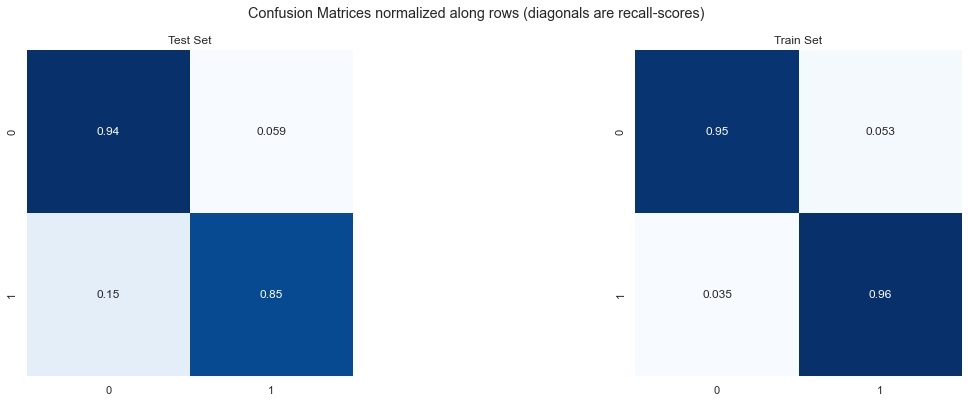

In [94]:
fig,ax = plt.subplots(1,2,figsize=(20,6))
plt.suptitle("Confusion Matrices normalized along rows (diagonals are recall-scores)")
sns.heatmap(confusion_matrix(y_test,y_pred_test,normalize='true'),annot=True,cbar=False,square=True,cmap='Blues',ax=ax[0])
ax[0].set_title("Test Set")

sns.heatmap(confusion_matrix(y_train,y_pred_train,normalize='true'),annot=True,cbar=False,square=True,cmap='Blues',ax=ax[1])
ax[1].set_title("Train Set")
plt.show()

This is a pretty decent model, again OOB model.

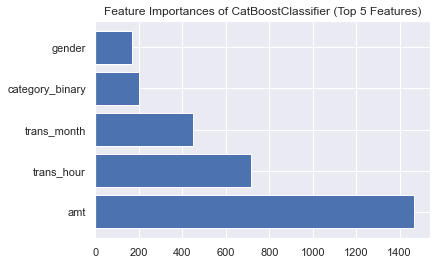

In [95]:
feat_imp_sorted_str = np.flip(np.sort(lgbm.feature_importances_))
feat_imp_sorted_args_str = np.flip(np.argsort(lgbm.feature_importances_))
feat_names_sorted_str = X_train.columns[feat_imp_sorted_args_str]

plt.barh(feat_names_sorted_str,feat_imp_sorted_str)
plt.title("Feature Importances of CatBoostClassifier (Top 5 Features)")
plt.show()

In [96]:
pickle.dump(lgbm,open('lgbm_fraud_transaction.pkl','wb'))